In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import gauss, sample
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


C:\Users\Ionatan\AppData\Local\Temp\ipykernel_14268\1201517847.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  d = sample(dist.keys(), 1)[0]


<AxesSubplot:xlabel='x', ylabel='y'>

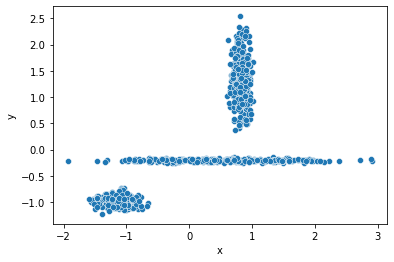

In [2]:
# Nos generamos un dataset con claros clusters

# Seteamos los parámetros de las 3 distribuciones

dist_1= {
  "dist1" : {
      "mean" : [15,15], # Probar con 5 5 tambien
      "sd" : [10,10],
  },
  "dist2" : {
      "mean" : [0,0],
      "sd" : [0.5,0.5],
  },
  "dist3" : {
      "mean" : [-5,-5],
      "sd" : [2,2],
  }
}


dist= {
  "dist1" : {
      "mean" : [3,40],
      "sd" : [1,10],
  },
  "dist2" : {
      "mean" : [0,0],
      "sd" : [10,0.5],
  },
  "dist3" : {
      "mean" : [-20,-20],
      "sd" : [2,2],
  }
}

# Generamos los datos aleatorios, primero escogemos al azar una de las 3 
# distribuciones y luego generamos la observación con los parámetros de 
# dicha distribución.
x = []
y = []
tipo = []
for i in range(1000):
  d = sample(dist.keys(), 1)[0]
  x.append(gauss(dist[d]["mean"][0], dist[d]["sd"][0]))
  y.append(gauss(dist[d]["mean"][1], dist[d]["sd"][1]))

df = pd.DataFrame({
    "x" : x,
    "y" : y,
})
# Agregamos una columna numerada
numerar = False
escala = 1
if numerar:
  df['index1'] = df.index*escala
escalar = True
if escalar:
  scaler=StandardScaler()
  df=scaler.fit_transform(df)
  if numerar:
    df = pd.DataFrame(df, columns = ['x','y','index1'])
  else:
    df = pd.DataFrame(df, columns = ['x','y'])
sns.scatterplot(data = df, x = "x", y = "y")

In [4]:
df

,x,y
0,-5.504863,0.602788
1,2.712391,50.127147
2,-1.269362,-1.638109
3,-8.696205,-6.816854
4,1.685615,37.909352
...,...,...
995,-8.648139,-9.530976
996,-12.206957,-12.353540
997,4.449914,37.852529
998,-7.942946,-9.984037


<AxesSubplot:xlabel='x', ylabel='y'>

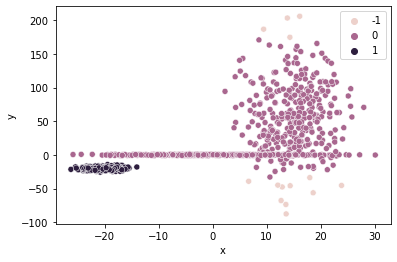

In [9]:



# Implementación de DBSCAN

dbscan = DBSCAN(eps=10, min_samples=5)
y_dbscan = dbscan.fit_predict(df)
y_dbscan


sns.scatterplot(data = df, x = "x", y = "y", hue=y_dbscan)


Text(0.5, 0.98, 'eps = 0.2')

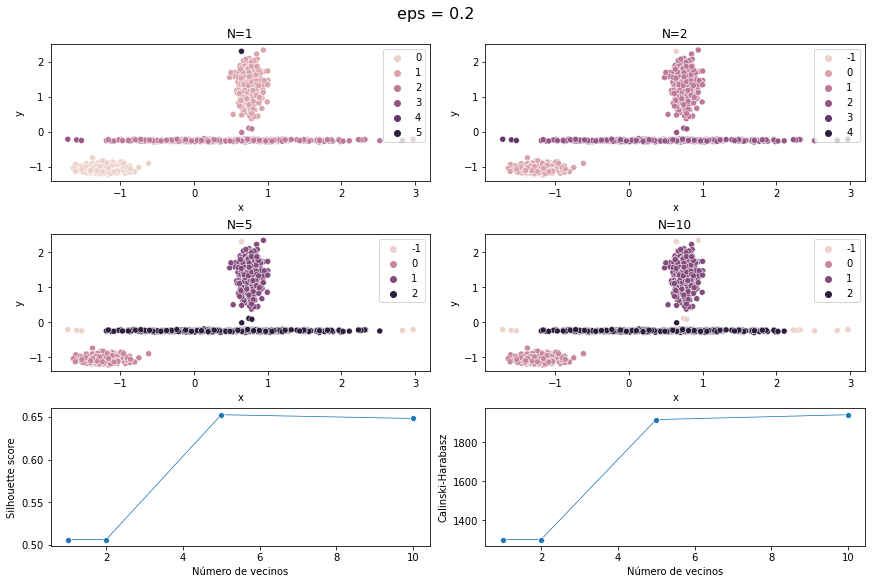

In [14]:
# Vamos a ver la regla del codo y el coeficiente de silhouette
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

fig, axs = plt.subplots(3, 2,figsize=(12,8),constrained_layout=True)
ax_i = axs.ravel()

n_max = 5
n_values = [1,2,5,10]
assert len(ax_i) == len(n_values)+2, "Las dimenciones de la cuadricula de los graficos no coincide con la cantidad de graficos a calcular"

if escalar:
    eps = 0.2 # Con 0.1 da mejor, probar en clase pero vincular a proximo grafico.
else:
    eps = 2
sil=[]
ch_scores=[]
x_index = []
for i,n in enumerate(n_values):
    
    dbscan = DBSCAN(eps=eps, min_samples=n)
    labels = dbscan.fit_predict(df)
    if len(np.unique(labels)) > 1:
        score=silhouette_score(df,labels)
        sil.append(score)
        score=calinski_harabasz_score(df,labels)
        ch_scores.append(score)
        x_index.append(n)

    sns.scatterplot(data = df, x = "x", y = "y", hue=labels, ax=ax_i[i]).set(title='N='+str(n))

sns.lineplot(x=x_index,y=sil,marker='o',size=30,legend=False, ax=ax_i[-2])
plt.setp(ax_i[-2], xlabel='Número de vecinos')
plt.setp(ax_i[-2], ylabel='Silhouette score')

sns.lineplot(x=x_index,y=ch_scores,marker='o',size=30,legend=False, ax=ax_i[-1])
plt.setp(ax_i[-1], xlabel='Número de vecinos')
plt.setp(ax_i[-1], ylabel='Calinski-Harabasz')

fig.suptitle(f'eps = {eps}', fontsize=16)


# Ver que pasa cuando se cambia las sd del cluster de abajo.
# Ver que pasa cuando se agrega un cluster extra
# Ver que pasa con una columna que no clusteree

Text(0.5, 0.98, 'N = 10')

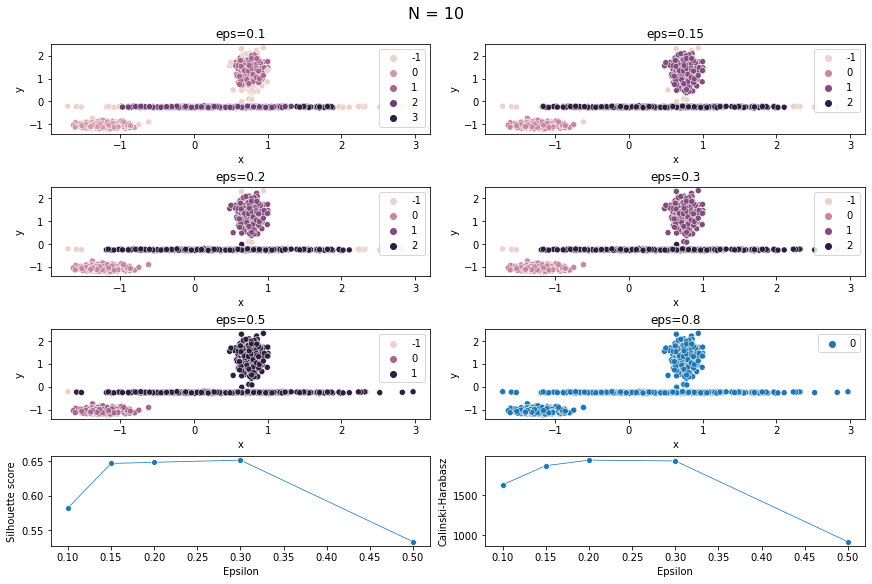

In [15]:
# Vamos a ver la regla del codo y el coeficiente de silhouette
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

fig, axs = plt.subplots(4, 2,figsize=(12,8),constrained_layout=True)
ax_i = axs.ravel()

N = 10
if escalar:
    e_values = [0.1,0.15,0.2,0.3,0.5,0.8]
else:
    e_values = [1,2,3,6,7,10]
assert len(ax_i) == len(e_values)+2, "Las dimenciones de la cuadricula de los graficos no coincide con la cantidad de graficos a calcular"

sil=[]
ch_scores=[]
x_index = []
for i,e in enumerate(e_values):
    dbscan = DBSCAN(eps=e, min_samples=N)
    labels = dbscan.fit_predict(df)
    if len(np.unique(labels)) > 1:
        score=silhouette_score(df,labels)
        sil.append(score)
        score=calinski_harabasz_score(df,labels)
        ch_scores.append(score)
        x_index.append(e)
        

    sns.scatterplot(data = df, x = "x", y = "y", hue=labels, ax=ax_i[i]).set(title='eps='+str(e))

sns.lineplot(x=x_index,y=sil,marker='o',size=30,legend=False, ax=ax_i[-2])
plt.setp(ax_i[-2], xlabel='Epsilon')
plt.setp(ax_i[-2], ylabel='Silhouette score')

sns.lineplot(x=x_index,y=ch_scores,marker='o',size=30,legend=False, ax=ax_i[-1])
plt.setp(ax_i[-1], xlabel='Epsilon')
plt.setp(ax_i[-1], ylabel='Calinski-Harabasz')
fig.suptitle(f'N = {N}', fontsize=16)

# Probar con N=5 y N=10

# Cual es el sentido de estas metricas?

No usar metricas si no tenemos claro que miden!